<a href="https://colab.research.google.com/github/bchiramani/ML-DL_Implementations/blob/main/MultiVariablePolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Variable Polynomial Regression 

In [7]:
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

## Generate Data

In [14]:
def generate_data (theta) : 
  x , y = make_regression(n_samples=100 , n_features = 1 , noise=5 )
  y = 5*y**3 +4*y**2+3*y+np.random.normal(-3,5,100)
  y=y.reshape((y.shape[0],1))
  X_train = np.hstack((x, np.ones(x.shape)))
  X_train= np.hstack((x**2,X_train))
  X_train= np.hstack((x**3,X_train))
  y_pred= model(X_train,theta)
  plt.scatter(x,y)
  print("in generate data : X_train", X_train.shape)
  print("in generate data : Y_train", y.shape)
  print("in generate data : Y_pred", y_pred.shape)
  
  return x , y , X_train, y_pred

In [15]:
def model (X_train , theta):
  return  X_train.dot(theta)

In [16]:
def cost_function(X_train,y,theta):
  m = len(y)
  return 1/(2*m) * np.sum((model(X_train,theta)-y)**2)

In [17]:
def gradient(X_train, y, theta):
  m=len(y)
  y_pred=model( X_train , theta)
  return (1/m)*(X_train.T.dot(y_pred-y))

In [22]:
def gradient_descent(X_train,y,theta,learning_rate,n_iterations):
  cost_history = np.zeros(n_iterations)
  for i in range(0,n_iterations):
    theta -= learning_rate * gradient (X_train,y,theta)
    cost_history[i] = cost_function(X_train,y,theta)
  return theta ,cost_history

## Main

in generate data : X_train (100, 4)
in generate data : Y_train (100, 1)
in generate data : Y_pred (100, 1)


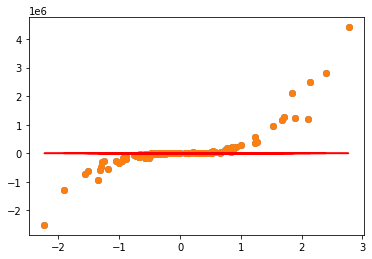

In [23]:
theta = np.random.randn( 4 , 1 )
x, y, X_train , y_pred = generate_data(theta)
# Plot the data
plt.scatter(x,y)
plt.plot( x , y_pred , c = 'r' )

In [24]:
# hyper parameters definition
learning_rate= 0.01
n_iterations = 1000

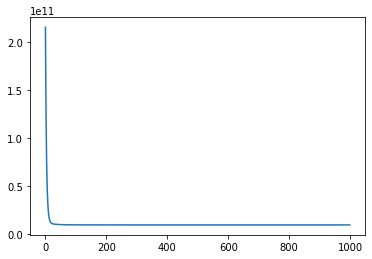

In [25]:
theta, cost_history = gradient_descent(X_train,y,theta,learning_rate,n_iterations)
y_pred = model(  X_train , theta )
plt.plot(range(n_iterations), cost_history)

generated data


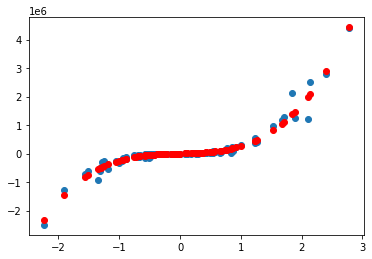

In [28]:
#Plot the predictions
print("generated data")
plt.scatter(x,y)
plt.scatter( x , y_pred , c = 'r' )